**Course**: [_Systèmes dynamiques en biologie_](https://moodle.epfl.ch/course/info.php?id=14291) (BIO-341)

**Professor**: _Felix Naef_

SSV, BA5, 2021

In [2]:
#import important libraries
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from scipy.integrate import odeint
from IPython.display import set_matplotlib_formats

# The Allee effect

The goal of this exercise is to understand the stability properties
of 1-dimensional first order ODEs and to study a model of population growth.

A fixed point $x^{*}$ of a 1-dimensional ODE $\dot{x}=F(x)$ satisfies
the condition $F(x^{*})=0$.


- A fixed point $x^{*}$ is $\underline{stable}$ if $F'(x^{*})<0$.

- A fixed point $x^{*}$ is $\underline{unstable}$ if $F'(x^{*})>0$.

- A fixed point $x^{*}$ is $\underline{semi-stable}$ if $F'(x^{*})=0$ and $F''(x^{*})\neq 0$.

## Stability of fixed points in 1-dimensional systems (paper and pencil)


Analyze the 1-dimensional systems below graphically:

* Sketch the derivative $\dot{x}=F(x)$ in function of $x$. 
* Mark all fixed points and determine their stability. When possible, calculate the fixed points explicitly. 
* Sketch the solutions $x(t)$ for two initial conditions leading to different qualitative behavior (for example one solution that flows to a fixed point and one that goes to infinity). 

(a) $\dot{x}=2x-x^{2}$

(b) $\dot{x}=x^{2}-8x+16$

(c) $\dot{x}=\cos(2x)+1-x$  

> **Solution (a)**

> The fixed points satisfy $2x-x^{2}=0\Rightarrow x\left(2-x\right)=0\Rightarrow x=0$ or $x=2$.

> **Here we provide the solution using a script. Note that you will be asked to sketch such solution by hand.**

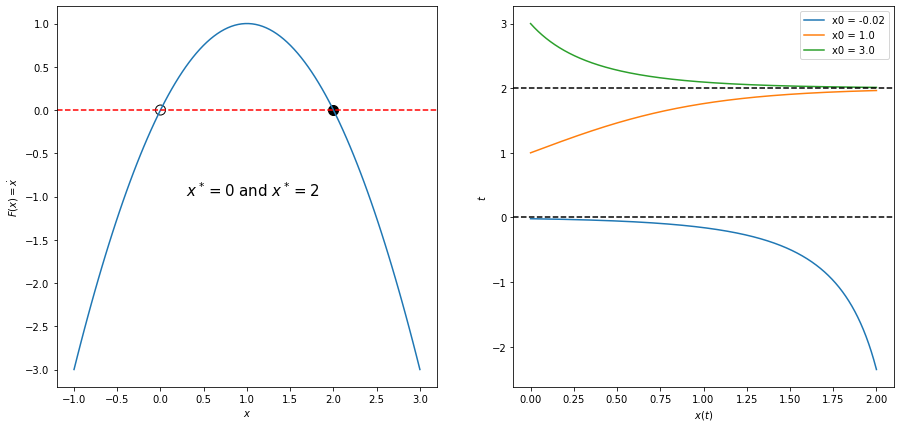

In [3]:
'''simulation of the system for (a)'''

#define F(x)
def F(x, t = 0):
    #t plays no role as the system is autonomous but is needed for odeint
    return 2*x-x**2

#show F(x)
x = np.linspace(-1,3,100)
y = F(x)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,7))
ax1.plot(x,y)
ax1.axhline(y = 0, color = 'red', ls = '--')
ax1.scatter(x=0,y=0, marker='o', s = 100, color = 'black', facecolors='none')
ax1.scatter(x=2,y=0, marker='o', s = 100, color = 'black')
ax1.text(x = 0.3, y= -1, s = r'$x^*=0$' + ' and ' + r'$x^*=2$', size = 15)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$F(x)=\dot{x}$')

#simulate F(x) in time
tspan = np.linspace(0,2,1000)
l_x0 = [-0.02, 1., 3.]
for x0 in l_x0:
    X = odeint(F, x0, tspan)
    ax2.plot(tspan,X, label = 'x0 = ' + str(x0))
ax2.axhline(y = 0., color = 'black', ls = '--')
ax2.axhline(y = 2., color = 'black', ls = '--')
ax2.set_xlabel(r'$x(t)$')
ax2.set_ylabel(r'$t$')

ax2.legend()
plt.show()

>(b) As suggested in the hint, $g\left(x\right)=\cos\left(2x\right)+1=2\cos^{2}x$ and $h\left(x\right)=x$, which intersect at $x\approx0.86$.

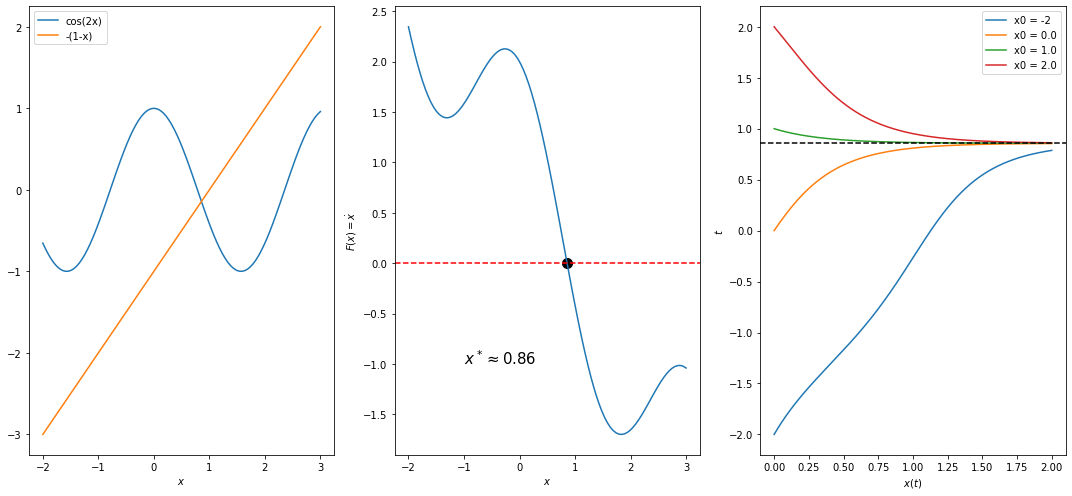

In [4]:
'''simulation of the system for (b)'''

#define F(x)
def F(x, t = 0):
    #t plays no role as the system is autonomous but is needed for odeint
    return np.cos(2*x)+1-x

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,7))

#show the intersection of cos(2x) with 1-x
x = np.linspace(-2,3,100)
y1 = np.cos(2*x)
y2 = -(1-x)

ax1.plot(x,y1, label = 'cos(2x)')
ax1.plot(x,y2, label = '-(1-x)')
ax1.legend()
ax1.set_xlabel(r'$x$')


#show F(x)
y = F(x)
ax2.plot(x,y)
ax2.axhline(y = 0, color = 'red', ls = '--')
ax2.scatter(x=0.86,y=0, marker='o', s = 100, color = 'black')
ax2.text(x = -1., y= -1, s = r'$x^* \approx 0.86$', size = 15)
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$F(x)=\dot{x}$')

#simulate F(x) in time
tspan = np.linspace(0,2,1000)
l_x0 = [-2, 0., 1., 2.]
for x0 in l_x0:
    X = odeint(F, x0, tspan)
    ax3.plot(tspan,X, label = 'x0 = ' + str(x0))
ax3.axhline(y = 0.86, color = 'black', ls = '--')
ax3.legend()
ax3.set_ylabel(r'$t$')
ax3.set_xlabel(r'$x(t)$')

plt.tight_layout()
plt.show()

>(c) There is only one fixed point at $x = 4$ that is semi-stable.

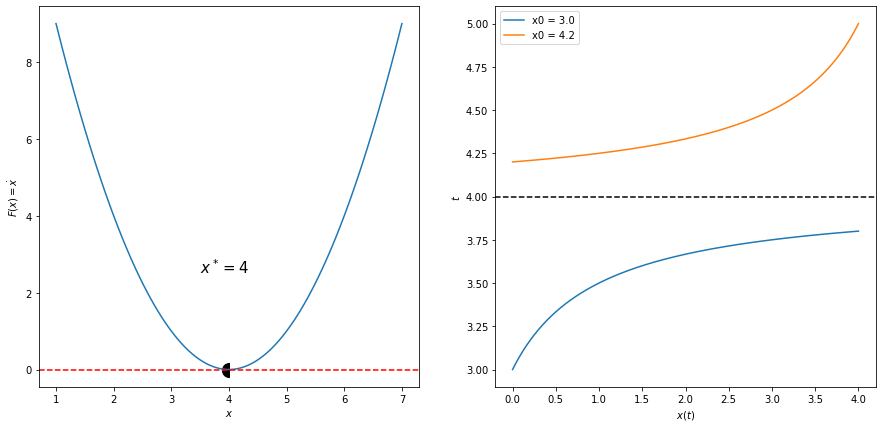

In [4]:
'''simulation of the system for (c)'''

#define F(x)
def F(x, t = 0):
    #t plays no role as the system is autonomous but is needed for odeint
    return x**2-8*x+16

#show F(x)
x = np.linspace(1,7,100)
y = F(x)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,7))
ax1.plot(x,y)
ax1.axhline(y = 0, color = 'red', ls = '--')
ax1.scatter(x=4,y=0, marker= MarkerStyle('o', fillstyle = 'left'), s = 200, color='black')

ax1.text(x = 3.5, y= 2.5, s = r'$x^*=4$', size = 15)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$F(x)=\dot{x}$')

#simulate F(x) in time
tspan = np.linspace(0,4,1000)
l_x0 = [3., 4.2]
for x0 in l_x0:
    X = odeint(F, x0, tspan)
    ax2.plot(tspan,X, label = 'x0 = ' + str(x0))
ax2.axhline(y = 4., color = 'black', ls = '--')
ax2.set_ylabel(r'$t$')
ax2.set_xlabel(r'$x(t)$')

ax2.legend()
plt.show()

## The Allee effect (paper and pencil)

Due to competition for resources, a population will experience a reduced growth rate
	when the number of individuals is large. But this is not necessarily
	sufficient to describe the dynamics of some populations. Indeed, for
	certain species, it has been observed that the growth rate of the population
	can be null or even negative for a low number of individuals. This
	is called the Allee effect and can be explained, for instance, by
	the fact that it is hard to find mates when the population density
	is too low. The effect leads to distinct dynamics for
	the population size.
	

Let us consider the model with $a,b>0,\,r>0$, and the number of individuals $N(t)\geq0$:

\begin{equation}
\dot{N}=rN-\frac N a(N-b)^{2}
\end{equation}
	
As $N$ can be factorized in this equation, it is convenient to study
	the *relative growth rate* $\dot{N}/N$. In order to get an Allee effect:
    
- the relative growth rate needs to reach a maximum
	at an intermediate population size and
- it has to be negative
	at small population sizes.

**Question 1**

Sketch the relative growth rate. 
- What is the maximum relative growth rate and for which number of individuals is it reached ?
- For which values of the parameters $a,b,r$ is there an Allee effect as described above?

*Answer:*
- The model is given by $\frac{\dot{N}}{N}=g(N)$, where $g(N)=r-\frac 1 a (N-b)^{2}$ is the relative growth rate. $g(N)$ is a concave parabola, it has the maximum at $b$ and it crosses the $N$-axis at $b\pm\sqrt{ar}$.
- The **maximum growth rate per capita** is realised for $b$ number of individuals and it is equal to $r$.
- The Allee effect is present when the parabola crosses the $N$-axis at positive values of $N$, which is realised for $b \gt \sqrt{ar}$.



> As said previously, $g(N)$ is a concave parabola that intersects the x-axis in $N^{*}=b\pm\sqrt{ar}$. These are the two fixed points. The graph below shows an example for $r$ = 10, $a$ = 500 and $b$ = 100.

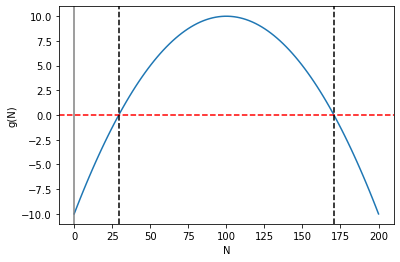

In [15]:
#define g(N)
def g(r, a, N, b):
    return r-(N-b)**2/a

#define parameters
r = 10
a = 500
b = 100

#plot g(N)
N = np.linspace(0,200,100)#np.linspace(0,7,100)

#plot g(N)
plt.plot(N, g(r,a,N,b))
plt.axhline(y = 0, color = 'red', ls = '--')
plt.axvline(x = b+(a*r)**0.5, color = 'black', ls = '--')
plt.axvline(x = b-(a*r)**0.5, color = 'black', ls = '--')
plt.axvline(x=0, c='gray')
plt.xlabel('N')
plt.ylabel('g(N)')
plt.show()

$\dot{N}$ is a cubic function (see figure below) that has 2 or 3 fixed points for $N\geq0$, depending on the parameters $a$ and $b$. The fixed points are either $N^{*}=0$ and $N^{*}=b+\sqrt{ar}$, or $N^{*}=0$ and $N^{*}=b\pm\sqrt{ar}$.

In the case $a > b^2/r$, $N^{*}=0$ is an unstable fixed point and $N^{*}=b+\sqrt{ar}$ a stable one. If $a < b^2/r$, then $N^{*}=0$ is a stable fixed point, $N^{*}=b-\sqrt{ar}$ an unstable one and $N^{*}=b+\sqrt{ar}$ is stable.

**Question 2**

Study the qualitative behavior of the solution using the  procedure:

* Sketch $\frac{\dot{N}}{N}$ in function of $N$ and the one-dimensional vector field on the $N$-axis. Which are the fixed points of this equation? Are they stable or unstable?
* Now, let's go back to the full equation. Represent $\dot{N}$ in function of $N$ for different conditions satisfying or not the Allee effect.
* Discuss the existence and stability of the fixed points, and how it relates to the presence/absence of the Allee effect.
* Discuss how the number of fixed points changes as a function of $a$. Plot the fixed points as a function of $a$. Which kind of trajectories are there in the $N-t$ plane depending on whether $a$ is smaller or bigger than $b^2/r$?
* Can you think of other causes that would lead to an Allee Effect ?

*Answer*

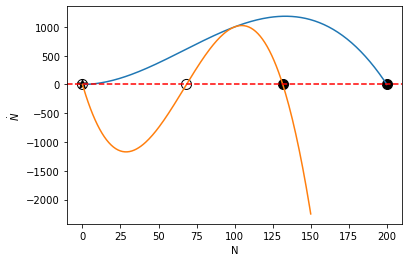

In [22]:
def Ndot(r, N, a, b):
    return r*N-N*(N-b)**2/a

#plot g(N)
N = np.linspace(0,200,200)

#define parameters in an easy way
b = 100
r = 10

#plot g(N) for r>ab**2 and r<ab**2
a = b**2/r 
N = np.linspace(0,200,200)
plt.plot(N, Ndot(r,N,a,b))
plt.scatter(x=b-np.sqrt(a*r),y=0, marker='o', s = 100, color = 'black', facecolors='none')
plt.scatter(x=b+np.sqrt(a*r),y=0, marker='o', s = 100, color = 'black')
#plt.text(x = 0.5, y = 4., s = r'$r>ab^2$, 2 fixed points for $N \geq 0$')

a = 100
N = np.linspace(0,150,200)
plt.plot(N, Ndot(r,N,a,b))
plt.axhline(y = 0, color = 'red', ls = '--')
plt.scatter(x=b-np.sqrt(a*r),y=0, marker='o', s = 100, color = 'black', facecolors='none')
plt.scatter(x=b+np.sqrt(a*r),y=0, marker='o', s = 100, color = 'black')
#plt.scatter(x=b+(r/a)**0.5,y=0, marker='o', s = 100, color = 'black')
#plt.text(x = -0.25, y =-1.5, s = r'$r<ab^2$, 3 fixed points for $N \geq 0$')


plt.scatter(x=0,y=0, marker='*', s = 100, color = 'black')
#plt.ylim([-2,8])
plt.xlabel('N')
plt.ylabel(r'$\dot{N}$')
plt.show()

For larger $a$, the unstable fixed point $N^{*}=b-\sqrt{ar}$ approaches the stable fixed point in 0 until it collapses into one single unstable fixed point, which occurs when $a=b^2/r$. Afterwards, only two fixed points remain: a stable one $N^{*}=b+\sqrt{ar}$ and an unstable one at 0. This case corresponds to the behavior of the population qualitatively similar to the logistic growth. See figure below.

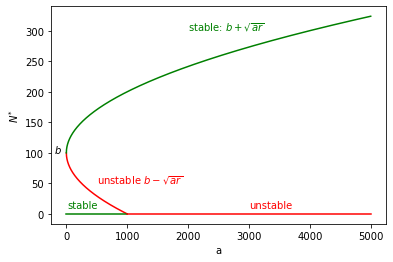

In [47]:
#define r domain
a = np.linspace(0,5000,5000)

#define parameters in an easy way
r = 10
b = 100

#plot N* depending on r
plt.plot(a, [x if x>=0 else np.nan for x in b-np.sqrt(a*r)], color = 'red')
plt.text(x = 2000, y = 300, s = 'stable: ' + r'$b+\sqrt{ar}$', color= 'green')

plt.text(x = -200., y = 100, s = r'$b$', color= 'black')

plt.plot(a, b+np.sqrt(a*r), color = 'green')
plt.text(x = 500, y = 50, s = 'unstable ' + r'$b-\sqrt{ar}$', color= 'red')

plt.plot([0, b**2/r], [0,0], color = 'green')
plt.text(x = 10, y = 10, s = 'stable', color= 'green')

plt.plot([b**2/r, 5000], [0,0], color = 'red')
plt.text(x = 3000, y = 10, s = 'unstable', color= 'red')

plt.xlabel('a')
plt.ylabel(r'$N^{*}$')
plt.show()
plt.close()

At low population densities for a small $a$, i.e. $a<b^{2}/r$, we have an unstable fixed point at $N=b-\sqrt{ar}$. Initial populations below this unstable fixed point will reach the stable fixed point at 0. This represents a critical population size below which the population risks extinction. This situation is unlike the logistic growth (see Course Chapter 1), where the trajectories always grow or decay to the only stable fixed point at $N=K$.

The general idea of the Allee effect is that for small populations, the growth rate of the population can be low and even negative. This can be due to a difficulty in finding mates, which can lead to consanguinity, but also to less efficient hunting strategies in small groups. 

## Formation of a dimer

The formation of a dimer $C$ from its subunits $A$ and $B$ can be described by the following reversible chemical reaction :

$$
A_{F}+B_{F}\overset{k_1}{\longrightarrow}C
$$

$$
C\overset{k_{-1}}{\longrightarrow}A_{F}+B_{F}
$$
	
The total concentrations of the proteins $A$ and $B$ are constant ; they are denoted by $A_{T}$ and $B_{T}$ , and by $A_{F}$ and $B_{F}$ for the concentrations of the free (non-bound) forms.

* Express the conservation of $A_{T}$ in function of $A_{F}$ and $C$.
* Write the equation describing the temporal evolution of the concentration of the complex $C$ by using the total concentrations of $A_{T}$ and $B_{T}$ and the kinetic constants $k_{1}$ and $k_{-1}$.
* Describe the type of this dynamical system (order, linearity, etc.).
* Calculate the **equilibrium** concentration of the complex, in other words what is the value of the **stable** fixed point for $C$. Express the result in function of $A_{T}$ and $B_{T}$.

>The total concentration of $A_{T}$ can be described as a sum of the free, non-bound form and the complexed form $C$: $A_{T}=A_{F}+C$.

>The equation for the temporal evolution of $C$ reads:
$$
\frac{dC}{dt}=k_{1}A_{F}B_{F}-k_{-1}C=k_{1}(A_{T}-C)(B_{T}-C)-k_{-1}C
$$

>The equation in point 2 represents a 1st order, non-linear ODE, due to the quadratic term in $C$. 


>Setting the time derivative to zero (steady state) and solving the quadratic equation $k_{1}(A_{T}-C)(B_{T}-C)-k_{-1}C=0$ for C leads to:
$$
C=\frac{k_{1}B_{T}+k_{1}A_{T}+k_{-1}\pm\sqrt{(-k_{1}B_{T}-k_{1}A_{T}-k_{-1})^{2}-4k_{1}^{2}A_{T}B_{T}}}{2k_{1}}
$$
Only the solution with the minus in front of the root is a stable fixed point. The latter observation can be deduced by noticing that the quadratic form corresponds to a convex parabola, therefore the first fixed point (the solution with minus) is stable.

## Scatchard plots

**Scatchard plots** were historically used in molecular biology to estimate the affinity (equilibrium constant) of DNA-binding proteins for DNA. Imagine that $A$ is your protein of interest and $B$ the amount of DNA that you can vary over a  broad range. Assume that you can measure the steady state amount (the values at the fixed point) of DNA bound to the protein (which is equivalent to the complex $C$ in the above reaction), and the amount of free (unbound) DNA.  
 **Note**: in practice this can be done using electrophoretic mobility shift assays (EMSA) but you do not need to know such techniques to solve the problem here.  
 
* Show that one can determine the dissociation constant $K_{d}=k_{-1}/k_{1}$ by linear regression, _i.e._ show that there is a linear relationship between the ratio $C/B_{F}$ and the bound fraction $C$.
* Set the necessary parameters and use Python to do a Scatchard plot
    * Start by plotting the linear relation between $C/B_{F}$ and $C$.
    * Add labels to your plot 
    * Add lines for the axis
    * Write what you are plotting

>If you set $dC/dt$ to 0 and solve for $C$ you get $C=\frac{k_{1}}{k_{-1}}A_{F}B_{F}$, which can be rearranged into $\frac{C}{B_{F}}=\frac{A_{T}-C}{K_{d}}$ with $K_{d}=\frac{k_{-1}}{k_1}$. This is the Scatchard equation, since by measuring now $C$ (=bound DNA-protein-complex) and $B_{F}$ (=free DNA) and then plotting the ratio $C/B_{F}$ versus $C$ you can determine the dissociation constant $K_{d}$ from the slope.

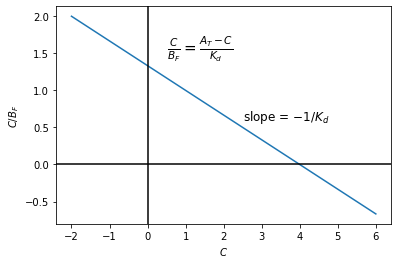

In [8]:
C = np.linspace(-2,6,100)
A_T = 4
K_d = 3

#plot C/B_F
plt.plot(C, (A_T-C)/K_d)
plt.xlabel(r'$C$')
plt.ylabel(r'$C/B_F$')
plt.axvline(0, c = 'black')
plt.axhline(0, c = 'black')
plt.text(0.5, 1.5, r'$\frac{C}{B_{F}}=\frac{A_{T}-C}{K_{d}}$', size = 15)
plt.text(2.5,0.6, 'slope = ' + r'$-1/K_d$', size = 12)
plt.show()
